# Лабораторна робота 3

**Тема:** Регресійний аналіз 

Встановлення
білбліотек:

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn

### Завдання 1

In [37]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

X,y = make_classification(n_samples=200, n_features=5, random_state=42, n_classes=2)

makeClassData = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 6)])
makeClassData["Target"]=y

makeClassData.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.407719,-0.095667,1.502357,-1.209659,-1.277852,0
1,1.171938,-0.734462,0.311250,-0.052759,-2.182368,1
2,0.208795,0.045808,0.332314,-1.325960,-0.961946,0
3,-0.766396,0.297780,-0.351513,1.394775,2.019333,1
4,-0.474432,0.295337,1.676437,0.036211,0.889946,1


### Завдання 2

In [21]:
BeansData = pd.read_csv("data/Dry_Bean_Dataset.csv")
BeansData.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Завдання 3

In [61]:
def make_dataset(samples, start_pt, end_pt, err):
    x = np.arange(start_pt[0], end_pt[0]
                  , (end_pt[0]-start_pt[0])/samples)
    
    y_pred = np.arange(start_pt[1], end_pt[1]
                  , (end_pt[1]-start_pt[1])/samples)
    
    y = y_pred + (np.random.random(samples)-0.5)*err
    return pd.DataFrame({"X":x,"Y":y})

df = make_dataset(200,(0,1),(350, 200), 60)
df.head()

,X,Y
0,0.00,10.130768
1,1.75,21.081181
2,3.50,7.932765
3,5.25,14.249747
4,7.00,8.531152


### Завдання 4

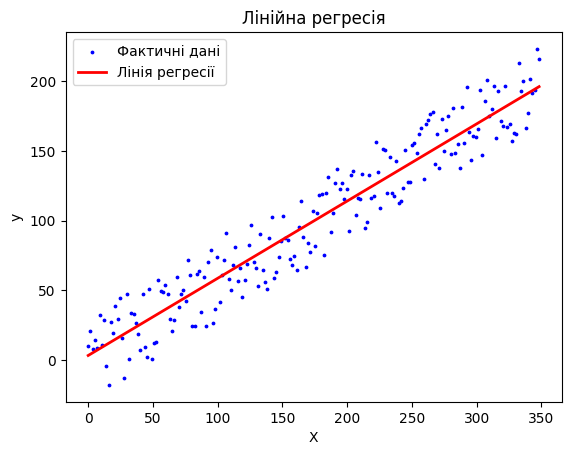

MSE: 296.33200459986483; MAE: 15.13231824135397; R2: 0.9134708129842949


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[["X"]]
y = df["Y"]


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Фактичні дані', s=3)
plt.plot(X, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE: {mse}; MAE: {mae}; R2: {r2}')
